#Performance analysis
Plot ROC curves and per-epoch performance analysis for trained models

In [18]:
import dataset, models
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
import pickle

%matplotlib inline

In [4]:
NUMEXS = 200

X_train, X_test, y_train, y_test = dataset.getSplitDataset(
    'transmembrane-region', num_exs=NUMEXS, bkgrd='global', 
    max_len=100, min_len=10, test_size=0.1)

In [5]:
input_dim = len(dataset.AAs) + 1

LSTMmodel = models.simpleLSTM(input_dim)
LSTMmodel.compile(loss='categorical_crossentropy', optimizer='adagrad')

/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/sandbox/rng_mrg.py:768: UserWarning: MRG_RandomStreams Can't determine #streams from size (Shape.0), guessing 60*256
  nstreams = self.n_streams(size)
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  start in [None, 0] or
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/tensor/subtensor.py:114: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  stop in [None, length, maxsize] or
/software/python_anaconda/2.2.0/lib/python2.7/site-packages/theano/scan_module/scan_perform_ext.py:85: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility
  from scan_perform.scan_perform import *


In [6]:
weights_path = '/home/gene245/cprobert/deep-psp/keras/output/'
weights_file = 'testname_model_weights'
LSTMmodel.load_weights(weights_path + weights_file)

In [16]:
test_preds = LSTMmodel.predict(X_test)
train_preds = LSTMmodel.predict(X_train)

180/180 [==============================] - 2s     


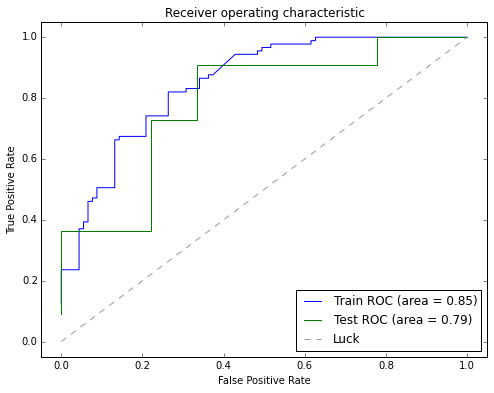

In [17]:
plt.figure(figsize=(8, 6))

# Plot the train ROC curve
train_labels_1 = y_train[:,1]
train_preds_1 = train_preds[:,1]
fpr, tpr, thresholds = roc_curve(train_labels_1, train_preds_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Train ROC (area = %0.2f)' % (roc_auc))

# Plot the test ROC curve
test_labels_1 = y_test[:,1]
test_preds_1 = test_preds[:,1]
fpr, tpr, thresholds = roc_curve(test_labels_1, test_preds_1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Test ROC (area = %0.2f)' % (roc_auc))

# Plot the 'luck' line
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

# Set axis dimensions
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
output_path = '/home/gene245/cprobert/deep-psp/keras/output/'
fit_pickle = 'testname_fit_results.pkl'
fit_results = pickle.load(open(output_path + fit_pickle))

{'acc': [0.5,
  0.50617283950617287,
  0.51851851851851849,
  0.51234567901234573,
  0.51851851851851849,
  0.51851851851851849,
  0.51851851851851849,
  0.52469135802469136,
  0.51234567901234573,
  0.52469135802469136,
  0.51851851851851849,
  0.51851851851851849,
  0.56172839506172845,
  0.53086419753086422,
  0.54320987654320985,
  0.52469135802469136,
  0.51851851851851849,
  0.5,
  0.53703703703703709,
  0.53086419753086422,
  0.54320987654320985,
  0.51851851851851849,
  0.54938271604938271,
  0.52469135802469136,
  0.52469135802469136,
  0.5679012345679012,
  0.59259259259259256,
  0.69753086419753085,
  0.58024691358024694,
  0.60493827160493829],
 'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'loss': [0.69997415582384881,
  0.69452511483829604,
  0.69325551164802734,
  0.69461149920447252,
  0.69333918638133374,
  0.69161052535057566,
  0.69342

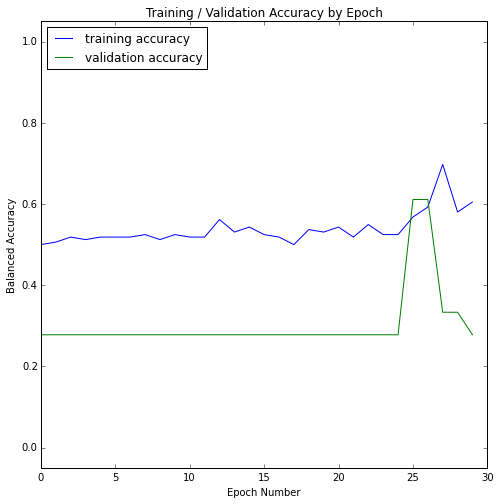

In [24]:
tr_acc = fit_results['acc']
val_acc = fit_results['val_acc']
epoch_nums = fit_results['epoch']

plt.figure(figsize=(8, 8))
plt.plot(epoch_nums, tr_acc, label='training accuracy')
plt.plot(epoch_nums, val_acc, label='validation accuracy')
plt.ylim([-0.05, 1.05])
plt.xlabel('Epoch Number')
plt.ylabel('Balanced Accuracy')
plt.title('Training / Validation Accuracy by Epoch')
plt.legend(loc="upper left")
plt.show()

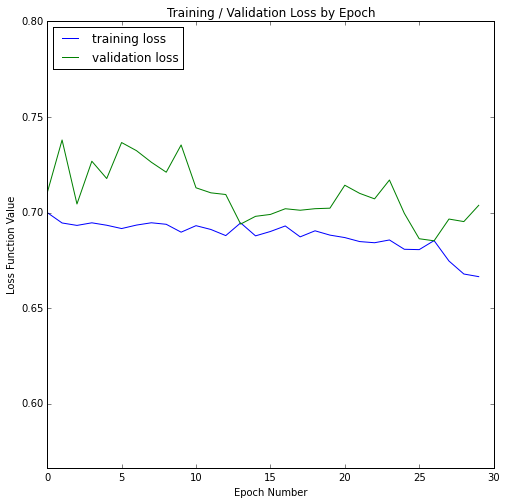

In [27]:
tr_loss = fit_results['loss']
val_loss = fit_results['val_loss']
epoch_nums = fit_results['epoch']

y_ax_min = np.min(np.min(tr_loss), np.min(val_loss)) - .1
y_ax_max = np.max(np.max(tr_loss), np.max(val_loss)) + .1
plt.figure(figsize=(8, 8))
plt.plot(epoch_nums, tr_loss, label='training loss')
plt.plot(epoch_nums, val_loss, label='validation loss')
plt.ylim([y_ax_min, y_ax_max])
plt.xlabel('Epoch Number')
plt.ylabel('Loss Function Value')
plt.title('Training / Validation Loss by Epoch')
plt.legend(loc="upper left")
plt.show()